In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:12<00:00, 260MB/s]
100% 1.06G/1.06G [00:12<00:00, 91.7MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
#Generators used for creating batches of data
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalization
def normal(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)

In [8]:
#CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.5750 - loss: 2.5366 - val_accuracy: 0.6766 - val_loss: 0.6228
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 74ms/step - accuracy: 0.7056 - loss: 0.5727 - val_accuracy: 0.7500 - val_loss: 0.5264
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 75ms/step - accuracy: 0.7446 - loss: 0.5132 - val_accuracy: 0.7950 - val_loss: 0.4511
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.8006 - loss: 0.4310 - val_accuracy: 0.7762 - val_loss: 0.4711
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8280 - loss: 0.3841 - val_accuracy: 0.7594 - val_loss: 0.5124
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.8636 - loss: 0.3155 - val_accuracy: 0.8038 - val_loss: 0.4907
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9054 - loss: 0.2282 - val_accuracy: 0.8222 - val_loss: 0.4675
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.9415 - loss: 0.1514 - 

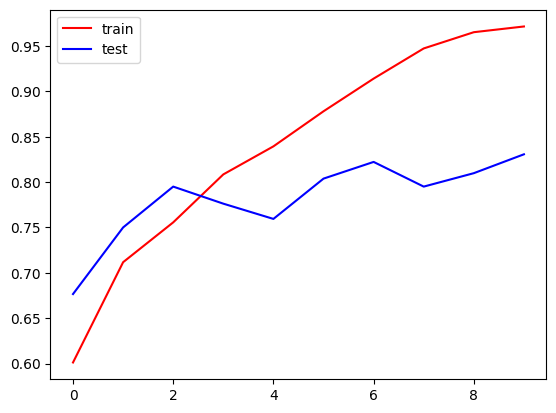

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

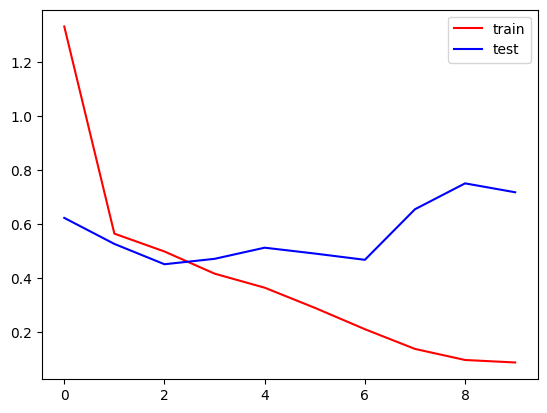

In [12]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

In [27]:
import cv2

In [57]:
test_img=cv2.imread('/content/dog.jpg')

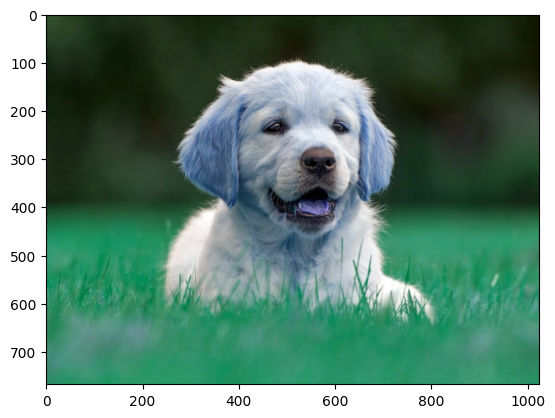

In [58]:
plt.imshow(test_img)

In [59]:
test_img.shape

(768, 1024, 3)

In [60]:
test_img = cv2.resize(test_img, (256, 256))
test_img = test_img / 255.0
test_img = test_img.reshape((1, 256, 256, 3))

In [61]:
prediction = model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [62]:
print("Predicted class:", "Dog" if prediction >= 0.5 else "Cat"," (with prediction value : ",prediction,")")

Predicted class: Dog  (with prediction value :  [[0.999539]] )


In [69]:
test_img_2 = cv2.imread('/content/cat.jpg')

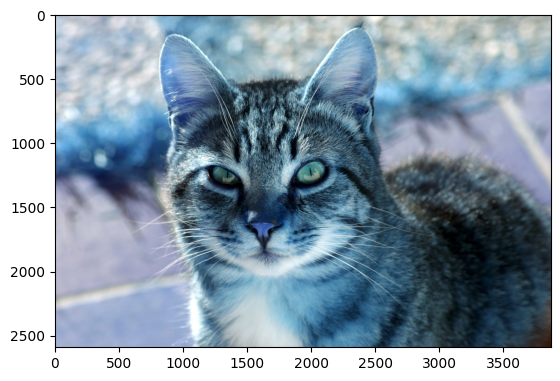

In [70]:
plt.imshow(test_img_2)

In [71]:
test_img_2 = cv2.resize(test_img_2, (256, 256))
test_img_2 = test_img_2 / 255.0
test_img_2 = test_img_2.reshape((1, 256, 256, 3))

In [72]:
prediction = model.predict(test_img_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [73]:
print("Predicted class:", "Dog" if prediction >= 0.5 else "Cat"," (with prediction value : ",prediction,")")

Predicted class: Cat  (with prediction value :  [[0.0014699]] )
